# PROJETO DE CONCLUSÃO DE MÓDULO

Em dupla, resolva um case para ingressar na empresa Ada & Rogério Ltda.

- Encontre um dataset do seu interesse
    - Kaggle (https://www.kaggle.com/datasets);
    - UCI ( https://archive.ics.uci.edu/ml/index.php);
    - Outras fontes.
   
- Faça uma boa análise de dados
    - Gráficos;
    - Correlações;
    - Agrupamentos;
    - Distribuições;
    - Etc.
    
- Defina um target e crie um modelo
    - SVM;
    - Ensembles;
    
    EEEE
    
    - Não-supervisionado.
    
## Entrega:
No dia da aula de reposição: 24/05

## Qualquer dúvida
r.otavioms@gmail.com

# Aula 04 - Métodos de Boosting (Parte II)


### Recordando: Bagging vs Boosting

Na aula passada, mencionamos alguns métodos de ensemble - *bagging* e *boosting* -, e contrastamos algumas diferenças entre eles, conforme esquematizado na figura abaixo.

<img src=https://pluralsight2.imgix.net/guides/81232a78-2e99-4ccc-ba8e-8cd873625fdf_2.jpg width=600>

Nesta aula, vamos avaliar uma outra metodologia de ensemble: o **gradient boosting**.

## Um outro método de ensemble: Gradient boosting

Além dos métodos que estudamos, há ainda outras classes de métodos de ensemble. Em particular, vamos agora estudar a classe de modelos que utiliza do procedimento conhecido como **gradient boosting**.

O gradient boosting também é baseado no princípio de boosting (utilização de weak learners sequencialmente adicionados de modo a **sequencialmente minimizar os erros cometidos**).

<img src=https://miro.medium.com/max/788/1*pEu2LNmxf9ttXHIALPcEBw.png width=600>

Entretanto, este método implementa o boosting através de um **gradiente** explícito. Isso significa que, a partir da definição de uma **função perda/erro**, que geralmente objetivamos minimizar, utilizaremos o *gradiente* da função em um dado ponto como indicativo de melhora/piora do modelo: quanto mais caminharmos na direção que o gradiente indique que estamos **diminuindo o erro mensurado pela função**, mais próximos estaremos de **convergir para um erro mínimo** conforme ditado pela nossa função de erro. 

Ou seja, em suma, a ideia é que caminhemos na direção do **erro mínimo** de maneira iterativa **passo a passo**, sendo que este caminho se dá justamente pelo **gradiente** da **função de custo/perda**, que mede justamente os erros cometidos.

<img src = https://miro.medium.com/v2/resize:fit:4800/format:webp/1*HrFZV7pKPcc5dzLaWvngtQ.png width = 400>:

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a3/Gradient_descent.gif width=400>

Este método é conhecido como:

### Gradiente descendente

**Atenção:** este será um método de **enorme importância** no estudo de redes neurais (e é, em geral, um método de otimização muito utilizado).

O objetivo geral do método é bem direto: determinar quais são os **parâmetros** da hipótese que minimizam a função de custo/perda. Para isso, o método "percorre" a função de erro, indo em direção ao seu mínim, e este "caminho" feito na função se dá justamente pela **determinação iterativa dos parâmetros**, isto é, **a cada passo, chegamos mais perto dos parâmetros finais da hipótese**, conforme eles são ajustados aos dados.

> **Pequeno interlúdio matemático:** o gradiente descendente implementado pelo gradient boosting é, na verdade, um **gradiente descendente funcional**, isto é, desejamos encontrar não um conjunto de parâmetros que minimiza o erro, mas sim **introduzir sequencialmente weak learners (hipótese simples) que minimizam o erro**. Desta forma, o gradient boosting minimiza a função de custo ao ecolher iterativamente hipóteses simples que apontam na direção do mínimo, neste espaço funcional.

Apesar do interlúdio acima, não precisamos nos preocupar muito com os detalhes matemáticos: o que importa é entender que no caso do gradient boosting, há alguns pontos importantes:

- Uma **função de custo/perda (loss)** é explicitamente minimizada por um procedimento de gradiente;

- O gradiente está relacionado com o procedimento de **encadeamento progressivo entre weak learners**, seguindo a ideia do boosting.

### Leituras complementares

Para quem desejar se aprofundar um pouco no formalismo do **gradient boosting** (e se aventurar na matemática), seguem algumas sugestões de materiais complementares: 

- [este post](https://www.gormanalysis.com/blog/gradient-boosting-explained/) ou [este site](https://explained.ai/gradient-boosting/), que contém vários materiais ótimos para entender o método com todos os detalhes matemáticos;

- os [vídeos do StatQuest](https://www.youtube.com/playlist?list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6);

- [artigo no medium: *A comprehensive guide to loss functions*](https://medium.com/analytics-vidhya/a-comprehensive-guide-to-loss-functions-part-1-regression-ff8b847675d6).

### Gradient boosting no sklearn

As classes do sklearn são:

- [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

- [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

E os principais hiperparâmetros a serem ajustados são:

- `n_estimators` : novamente, o número de weak learners encadeados.

- `learning_rate` : a constante que multiplica o gradiente no gradiente descendente. Essencialmente, controla o "tamanho do passo" a ser dado em direção ao mínimo.

Segundo o próprio [User Guide](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting): "*Empirical evidence suggests that small values of `learning_rate` favor better test error. The lireature recommends to set the learning rate to a small constant (e.g. `learning_rate <= 0.1`) and choose `n_estimators` by early stopping.*"

Ainda sobre a learning rate, as ilustrações a seguir ajudam a entender sua importância:

<img src=https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png width=700>

<img src=https://cdn-images-1.medium.com/max/1440/0*A351v9EkS6Ps2zIg.gif width=500>

Vamos retomar o exemplo da aula passada utilizando, agora, o formalismo do **gradient boosting**.

Como temos recorrentemente notado, a escolha dos hiperparâmetros pode influir fortemente sobre os resultados. Sendo assim, é sempre uma boa prática ter a possibilidade de otimização de hiperparâmetros sob consideração.

In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
df = sns.load_dataset("penguins")
df.shape

(344, 7)

In [22]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [24]:
df.groupby("species")["bill_length_mm"].mean()

species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: bill_length_mm, dtype: float64

In [25]:
df_adelie = df.query("species == 'Adelie'")
df_chinstrap = df.query("species == 'Chinstrap'")
df_gentoo = df.query("species == 'Gentoo'")

In [26]:
df_adelie["bill_length_mm"].fillna(38.791391, inplace = True)
df_chinstrap["bill_length_mm"].fillna(48.833824, inplace = True)
df_gentoo["bill_length_mm"].fillna(47.504878, inplace = True)

In [27]:
df_adelie.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  6
dtype: int64

In [47]:
df_adelie["bill_depth_mm"] = df_adelie["bill_depth_mm"].interpolate(methods = "linear")
df_adelie["flipper_length_mm"] = df_adelie["flipper_length_mm"].interpolate(methods = "linear")
df_adelie["body_mass_g"] = df_adelie["body_mass_g"].interpolate(methods = "linear")

In [48]:
df_chinstrap["bill_depth_mm"] = df_chinstrap["bill_depth_mm"].interpolate(methods = "linear")
df_chinstrap["flipper_length_mm"] = df_chinstrap["flipper_length_mm"].interpolate(methods = "linear")
df_chinstrap["body_mass_g"] = df_chinstrap["body_mass_g"].interpolate(methods = "linear")

df_gentoo["bill_depth_mm"] = df_gentoo["bill_depth_mm"].interpolate(methods = "linear")
df_gentoo["flipper_length_mm"] = df_gentoo["flipper_length_mm"].interpolate(methods = "linear")
df_gentoo["body_mass_g"] = df_gentoo["body_mass_g"].interpolate(methods = "linear")

In [49]:
df_gentoo.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  5
dtype: int64

In [50]:
df_chinstrap.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [51]:
df_adelie.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  6
dtype: int64

In [52]:
df_final = pd.concat([df_adelie, df_chinstrap, df_gentoo], axis= 0)
df_final.shape

(344, 7)

In [56]:
df_final.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [59]:
X = df_final.select_dtypes(include = np.number)
y = df_final["species"]

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
gbc = GradientBoostingClassifier(
    learning_rate = 0.1, 
    n_estimators = 100,
    max_depth = 3
)

In [91]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [92]:
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

TREINO
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       122
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



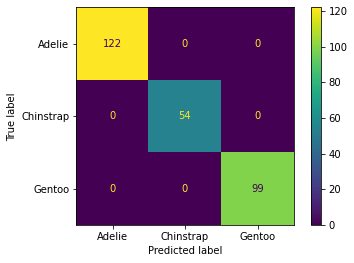

TESTE
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



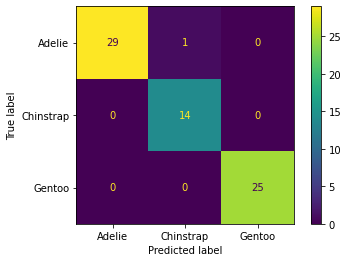

In [93]:
print("TREINO")
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print("TESTE")
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## XGBoost

Chegamos ao nosso último método de ensemble, o XGBoost (e**X**treme **G**radient **Boost**ing).

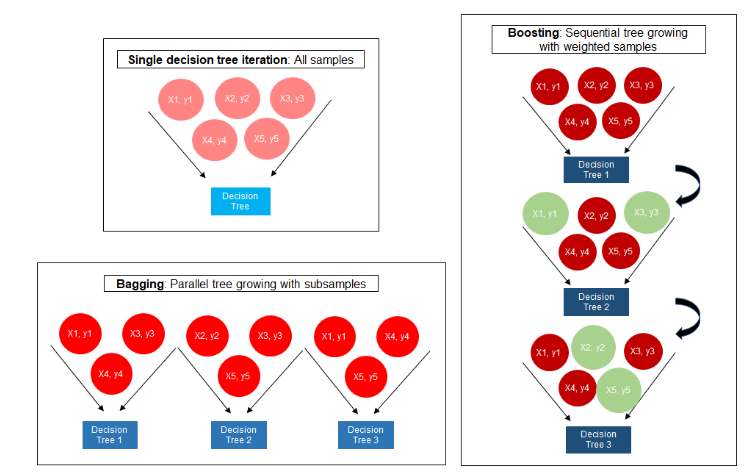

Este método nada mais é que um gradient boosting, mas com algumas importantes modificações que lhe conferem o título de "extreme"! Em particular, duas alterações merecem destaque:

- A adição de procedimentos de regularização (L1 e L2!), o que melhora consideravelmente sua capacidade de generalização;

- A utilização de derivadas de segunda ordem (Hessiano) para o procedimento de gradiente.

Para quem desejar se **aprofundar no assunto**, seguem algumas sugestões de leituras:

- [Este](https://shirinsplayground.netlify.app/2018/11/ml_basics_gbm/) explica bem as particularidades do XGBoost, além de dar uma boa introdução ao gradient boosting (código em R);

- [Este](https://medium.com/analytics-vidhya/what-makes-xgboost-so-extreme-e1544a4433bb) introduz bem o método, enquanto enfatiza suas particularidades, com alguns detalhes matemáticos;

- [Este](https://xgboost.readthedocs.io/en/latest/tutorials/model.html), da própria documentação da biblioteca, traz uma boa explicação, e com alguns detalhes matemáticos;

- [Este](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d) traz uma discussão mais alto-nível (sem tantos detalhes) sobre o XGBoost e os motivos de seu sucesso.

Infelizmente, o sklearn não tem o XGBoost implementado. Mas, felizmente, existe uma biblioteca que o implementou, de maneira totalmente integrada ao sklearn: a [XGBoost](https://xgboost.readthedocs.io/en/latest/).

Para instalar a biblioteca:

`!pip install xgboost`

https://xgboost.readthedocs.io/en/stable/python/python_api.html

Como **exemplo da utilização do xgboost**, vamos trabalhar com um [dataset relacionado a ações de marketing de uma instituição bancária portuguesa.](https://www.kaggle.com/datasets/krantiswalke/bankfullcsv)

In [11]:
!pip install xgboost

In [94]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Feature importance

[plot_importance](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.plot_importance)

Vimos, assim, um exemplo da utilização do xgboost para classificação! Vale ressaltar que o modelo também pode ser usado para regressão, além de também poder ser aplicado para outras situações, como [ranqueamentos](https://medium.com/predictly-on-tech/learning-to-rank-using-xgboost-83de0166229d).